In [18]:
# Prepare the Data
# Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames into a single DataFrame.

# Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. 




import pandas as pd


mouse_metadata = pd.read_csv("Mouse_metadata.csv")


study_results = pd.read_csv("Study_results.csv")

# combine both data sets
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# display firs five rows
print(combined_data.head())

#display number of unique mouse id's
new_df_unique_values = combined_data ["Mouse ID"].nunique()
print(new_df_unique_values)

# search for dupilicates
duplicates = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_data = combined_data[duplicates]

#display duplicates
if not duplicated_data.empty:
    print("Duplicates found:")
    print(duplicated_data)
else:
    print("No duplicate time points found.")






  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
249
Duplicates found:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Fe

In [19]:

# Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.






# Creating a new DataFrame by taking out the duplicates
cleaned_data = combined_data[~duplicates]  # '~' is used to invert the boolean series

# show the first five rows of the new datframe
print(cleaned_data.head())



  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [8]:

# Display the updated number of unique mice IDs.


# display new unique mice count
unique_mice_count = cleaned_data["Mouse ID"].nunique
print(cleaned_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [20]:



# select/ create columns and create a data frame based off the columns. Find out how many unique drug regimens are there. 
# calculate the statistics
# The drug regimens will be on the index side

unique_drug = cleaned_data["Drug Regimen"].nunique()
unique_regimen_names = cleaned_data["Drug Regimen"].unique()
print(unique_drug)
print(unique_regimen_names)




10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [19]:
# Generate Summary Statistics
# Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, so the method you use is less important than the result.

# Your summary statistics should include:

# A row for each drug regimen. These regimen names should be contained in the index column.

# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.




# This makes the indexes the names of the drug regimens
grouped = cleaned_data.groupby('Drug Regimen')


# Calculate statistics and  name columns using agg.() function or also known as aggregation

# 'the tumor volume (mm3)' column is in the brackets because i'm narrowing down the 
# focus from all potential data columns to just the 'Tumor Volume (mm3)' column.
# Its essential for directing the agg() method to operate on the specific column you are interested in analyzing within the grouped data. 

summary_stats = grouped['Tumor Volume (mm3)'].agg(
    mean='mean',  # This creates a column named "mean"
    median='median',  # This  creates a column named "median"
    variance='var',  # This  creates a column named "variance"
    standard_deviation='std',  # This  creates a column named "standard deviation"
    SEM='sem'  # This  creates a column named "SEM of the tumor volume"
)

print(summary_stats)




                   mean     median   variance  standard_deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.458254  50.854632  44.053659            6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


<Axes: xlabel='Drug Regimen'>

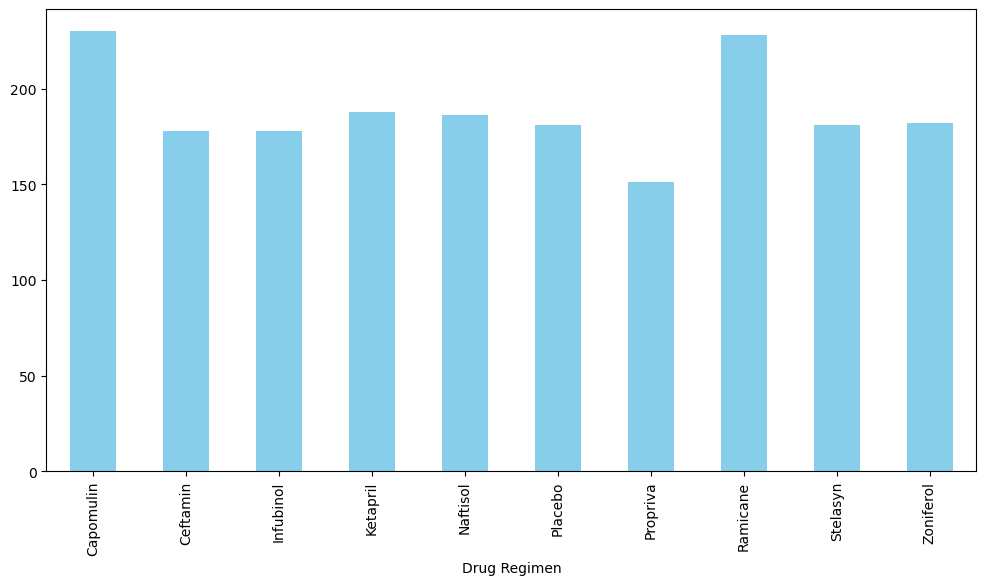

In [21]:
# Create Bar Charts and Pie Charts

# Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) 
# for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.






timepoint_regime = cleaned_data.groupby('Drug Regimen')['Timepoint'].count()
timepoint_regime.plot(kind='bar', color='skyblue', figsize=(12, 6))
# .plot function 'kind' is the type of graph. 'Color' is the color of the graph. figsize is the measurment size of the graph.



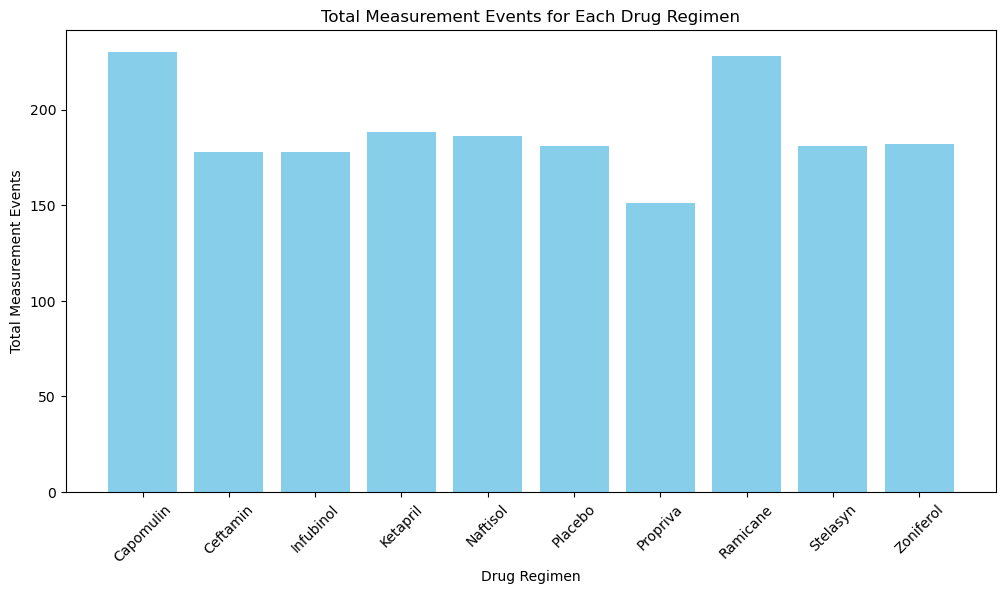

In [22]:
# Create the second bar chart with Matplotlib's pyplot methods.



import matplotlib.pyplot as plt


x = timepoint_regime.index
y = timepoint_regime.values
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurement Events')  
plt.title('Total Measurement Events for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()





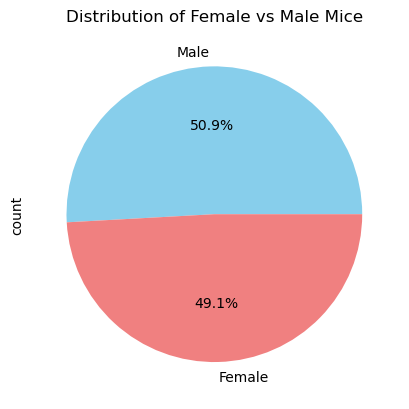

In [23]:
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

# Create the first pie chart with the Pandas DataFrame.plot() method.




gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice')
plt.show()

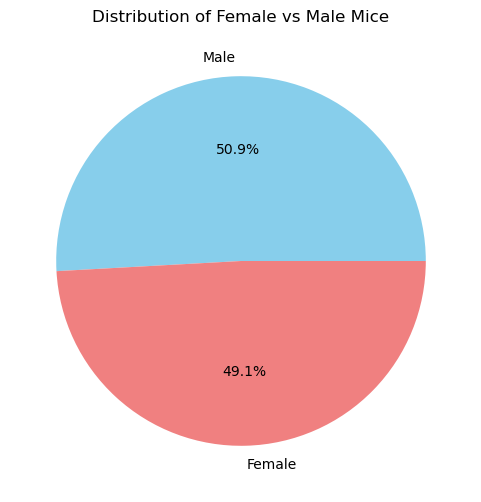

In [24]:
# Create the second pie chart with Matplotlib's pyplot methods.




gender_distribution = cleaned_data['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice')
plt.show()

In [31]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. 
# Use the following substeps:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.




# Example DataFrame loading
# mouse_metadata = pd.read_csv("Mouse_metadata.csv")
# study_results = pd.read_csv("Study_results.csv")
# combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')





# Assuming 'cleaned_data' is already defined and contains the data after duplicates have been removed

# List of drug regimens you're interested in
selected_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volumes_list = []
treatment_list = selected_drug_regimens


# Filter the 'cleaned_data' only for the selected drug regimens
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_drug_regimens)]

# groupby find the max timepoint for each mouse
max_timepoint_per_mouse = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# merge the max timepoint with the 'cleaned_data'
max_timepoint_data = pd.merge(max_timepoint_per_mouse, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the new DataFrame with the maximum timepoints
print(max_timepoint_data.head())

for drug in treatment_list:
    # Locate the rows which match the drug and get the final tumor volumes
    final_tumor_volumes = max_timepoint_data[max_timepoint_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
tumor_volumes_list.append(final_tumor_volumes)

quartiles = final_tumor_volumes.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - 1.5 * iqr
upper_bound = upperq + 1.5 * iqr
    
    
print(f"Results for {drug}:")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
print(f"Potential outliers for {drug}: {outliers}\n")

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  
Results for Ceftamin:
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Potential outliers for Ceftamin: Series

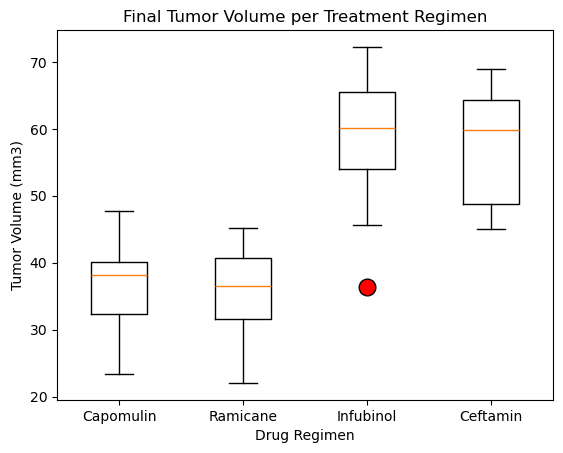

In [38]:

# Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. 
# Highlight any potential outliers in the plot by changing their color and style.


import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# Merge the data on 'Mouse ID'
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Remove duplicates if any
clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Find the last timepoint for each mouse
last_timepoint_df = clean_data.groupby('Mouse ID').Timepoint.max().reset_index()

# Merge this with the clean data to get the tumor volume at the last timepoint
final_volume_df = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'])

# Focus on specific drug regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

for drug in treatment_regimens:
    final_tumor_vol = final_volume_df[final_volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volumes.append(final_tumor_vol)

# Calculate outliers
outlier_props = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
fig, ax = plt.subplots()

# Create box plot
ax.boxplot(tumor_volumes, flierprops=outlier_props, labels=treatment_regimens)
ax.set_title('Final Tumor Volume per Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
plt.show()


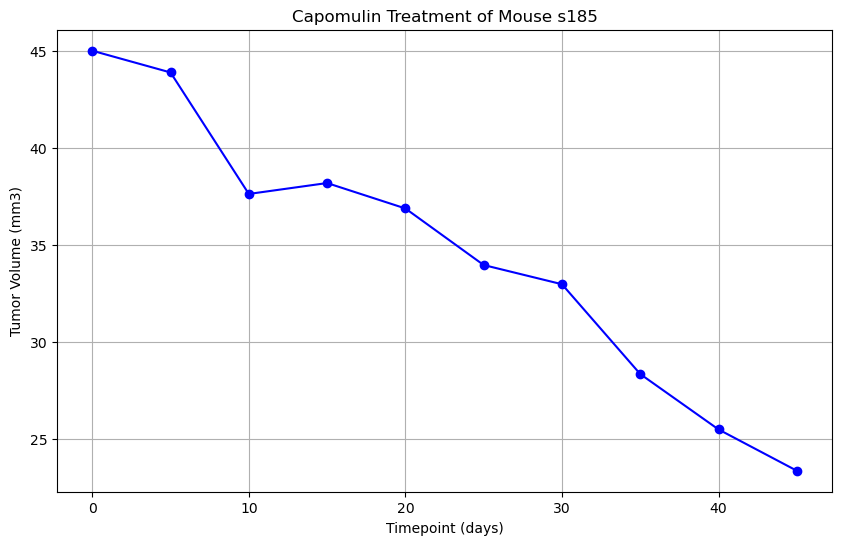

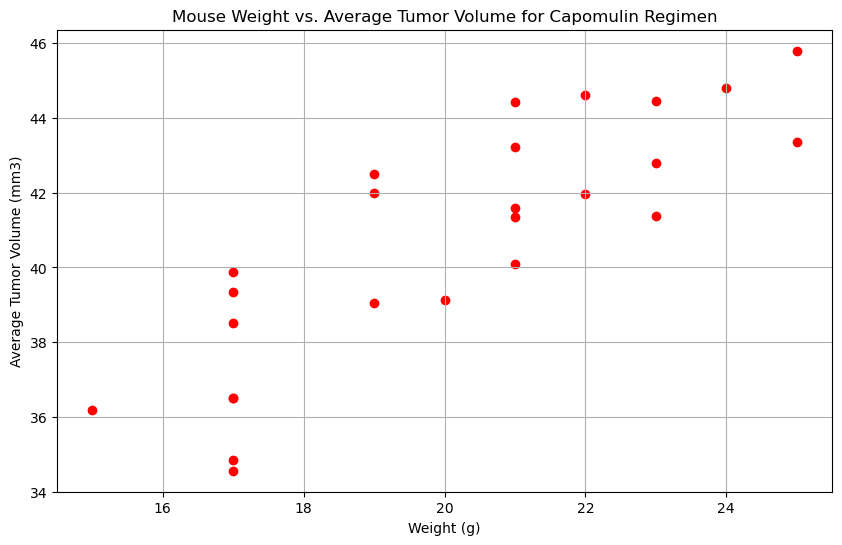

In [39]:
# Create a Line Plot and a Scatter Plot
# Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.
# Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.


import pandas as pd
import matplotlib.pyplot as plt


mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# merge data
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Filter data 
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Select one mouse 
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

# line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title('Capomulin Treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

# scatter plot
avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',  # Average weight (should be constant for each mouse)
    'Tumor Volume (mm3)': 'mean'  # Average tumor volume
})

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()




The correlation coefficient between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55


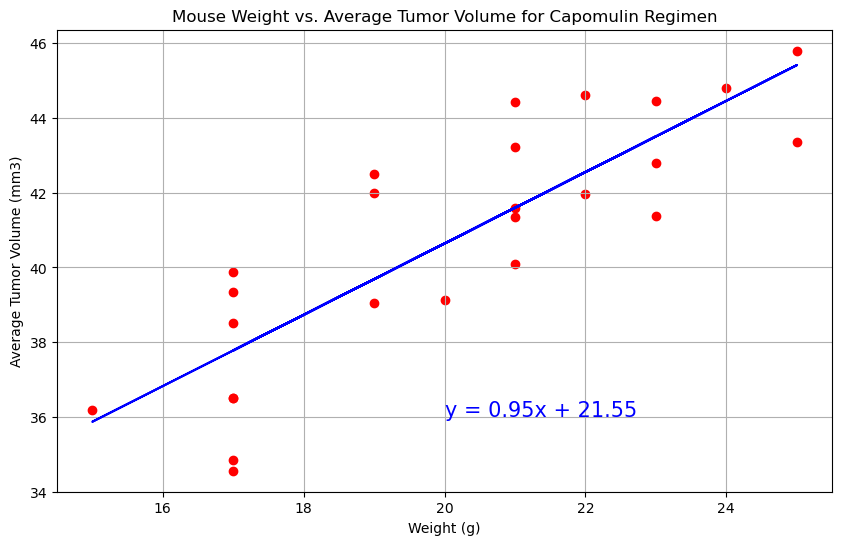

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# Merge the data on 'Mouse ID'
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Filter data for Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and weight for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',  # Average weight (should be constant for each mouse)
    'Tumor Volume (mm3)': 'mean'  # Average tumor volume
})

# Calculate the correlation coefficient
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

# Create the equation of the line to calculate predicted tumor volume
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='r')
plt.plot(avg_tumor_vol['Weight (g)'], intercept + slope * avg_tumor_vol['Weight (g)'], 'b-')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.annotate(line_eq, (20, 36), fontsize=15, color="blue")
plt.show()
